In [5]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import random

In [3]:
path = r'C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/'
dir = pathlib.Path(path)

In [4]:
pwd()

'C:\\Users\\akhil\\OneDrive\\Desktop\\JUPYTER_PROJECTS'

In [5]:
c = len(list(dir.glob("*/*.jpg")))

In [6]:
c

6400

In [7]:
list(dir.glob("*/*.jpg"))

[WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_10.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_100.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_101.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_102.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_103.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_104.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_105.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_106.jpg'),
 WindowsPath('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/Dataset/Mild_Demented/mild_107.jp

C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Mild_demented\mild_774.jpg


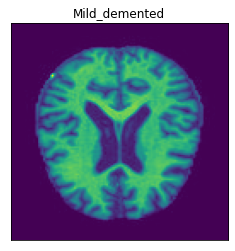

In [8]:
MD = random.choice(list(dir.glob("Mild_demented/*.jpg")))
img = plt.imread(MD)
print(MD)
plt.xticks([])
plt.yticks([])
plt.title("Mild_demented")
plt.imshow(img)

C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Mild_demented\mild_774.jpg


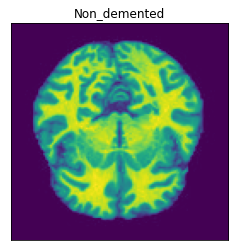

In [9]:
ND = random.choice(list(dir.glob("Non_demented/*.jpg")))
img = plt.imread(ND)
print(MD)
plt.xticks([])
plt.yticks([])
plt.title("Non_demented")
plt.imshow(img)

In [10]:
VMD = random.choice(list(dir.glob("Very_Mild_demented/*.jpg")))
print(VMD)

C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Very_Mild_demented\verymild_412.jpg


C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Moderate_Demented\moderate_39.jpg
<class 'int'>


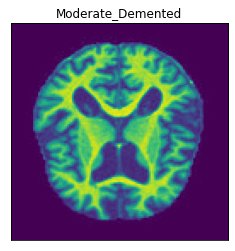

In [11]:
ModD = random.choice(list(dir.glob("Moderate_Demented/*.jpg")))

def A(a,b):
    img = plt.imread(a)
    print(a)
    print(type(b))
    plt.xticks([])
    plt.yticks([])
    
    
    if b == 0:
        plt.title("Mild_demented")
    elif b == 1:
        plt.title("Moderate_Demented")
    elif b == 2:
        plt.title("Non_demented")
    elif b == 3:
        plt.title("Very_Mild_demented")
    else:
        plt.title("Unamed")
#     switcher = {
#         0 : plt.title("Mild_demented"),
#         1 : plt.title("Moderate_Demented"),
#         2 : plt.title("Non_demented"),
#         3 : plt.title("Very_Mild_demented")
#     }
    plt.imshow(img)
    
A(ModD,1)

C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Non_demented\non_645.jpg
<class 'int'>


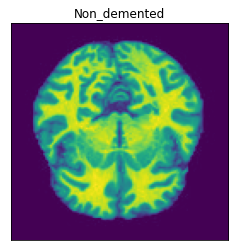

In [12]:
A(ND,2)

C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Mild_demented\mild_774.jpg
<class 'int'>


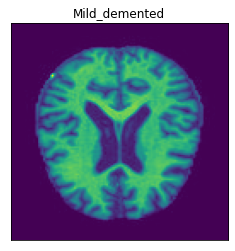

In [13]:
A(MD,0)

C:\Users\akhil\OneDrive\Desktop\JUPYTER_PROJECTS\Dataset\Very_Mild_demented\verymild_412.jpg
<class 'int'>


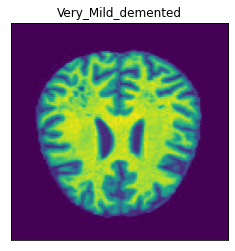

In [14]:
A(VMD,3)

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory as ifd
 
train = ifd(dir,validation_split = 0.2,
           subset = "training",
           seed = 123,
           image_size = (img

SyntaxError: unexpected EOF while parsing (3849138475.py, line 6)

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory as ifd
 
train = ifd(dir,validation_split = 0.2,
           subset = "training",
           seed = 123,
           image_size = (224,224),
           batch_size = 32)


Found 6400 files belonging to 4 classes.
Using 5120 files for training.


In [103]:
val_data = ifd(dir,validation_split = 0.2,
              subset = "validation",
              seed = 123,
              image_size = (224,224),#height, width
               batch_size = 32
              )


Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [17]:
def IFD(vs,ss,sd,imh,imw,bz):
    print(vs,ss,sd,imh,imw,bz)
    return ifd(dir,validation_split = vs,
        subset = ss,
        seed = sd,
        image_size = (imh,imw),#height, width
        batch_size = bz)


In [18]:
vs = 0.3
ssv = "validation"
sst = "training"
sd = 123
imh = 224
imw = 224
bz = 32

val_data2 = IFD(vs,ssv,sd,imh,imw,bz)
print("------")
train_data2 = IFD(vs,sst,sd,imh,imw,bz)

0.3 validation 123 224 224 32
Found 6400 files belonging to 4 classes.
Using 1920 files for validation.
------
0.3 training 123 224 224 32
Found 6400 files belonging to 4 classes.
Using 4480 files for training.


In [117]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape = (imh,imw,3)),
    layers.Conv2D(16,3,padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128,activation = "relu"),
    layers.Dense(4,activation="softmax")
])

In [120]:
model.compile(optimizer = "Adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])
epochs = 50
history = model.fit(train,epochs = epochs,validation_data = val_data,batch_size = bz)

Epoch 1/50
160/160 [==============================] - 19s 52ms/step - loss: 1.8262 - accuracy: 0.5318 - val_loss: 0.8571 - val_accuracy: 0.5906
Epoch 2/50
160/160 [==============================] - 8s 48ms/step - loss: 0.8007 - accuracy: 0.6426 - val_loss: 0.6983 - val_accuracy: 0.6891
Epoch 3/50
160/160 [==============================] - 9s 53ms/step - loss: 0.6151 - accuracy: 0.7531 - val_loss: 0.5196 - val_accuracy: 0.7773
Epoch 4/50
160/160 [==============================] - 9s 54ms/step - loss: 0.3605 - accuracy: 0.8781 - val_loss: 0.3153 - val_accuracy: 0.9078
Epoch 5/50
160/160 [==============================] - 8s 48ms/step - loss: 0.2297 - accuracy: 0.9240 - val_loss: 0.1950 - val_accuracy: 0.9484
Epoch 6/50
160/160 [==============================] - 8s 50ms/step - loss: 0.1469 - accuracy: 0.9574 - val_loss: 0.1568 - val_accuracy: 0.9547
Epoch 7/50
160/160 [==============================] - 8s 49ms/step - loss: 0.0904 - accuracy: 0.9777 - val_loss: 0.1080 - val_accuracy: 0.971

In [122]:
model.save('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/ALZ.h5')


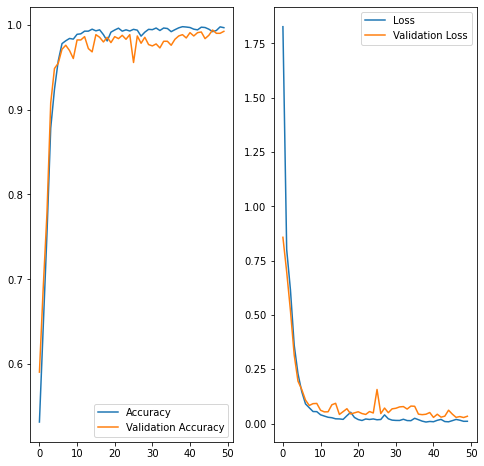

In [123]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step


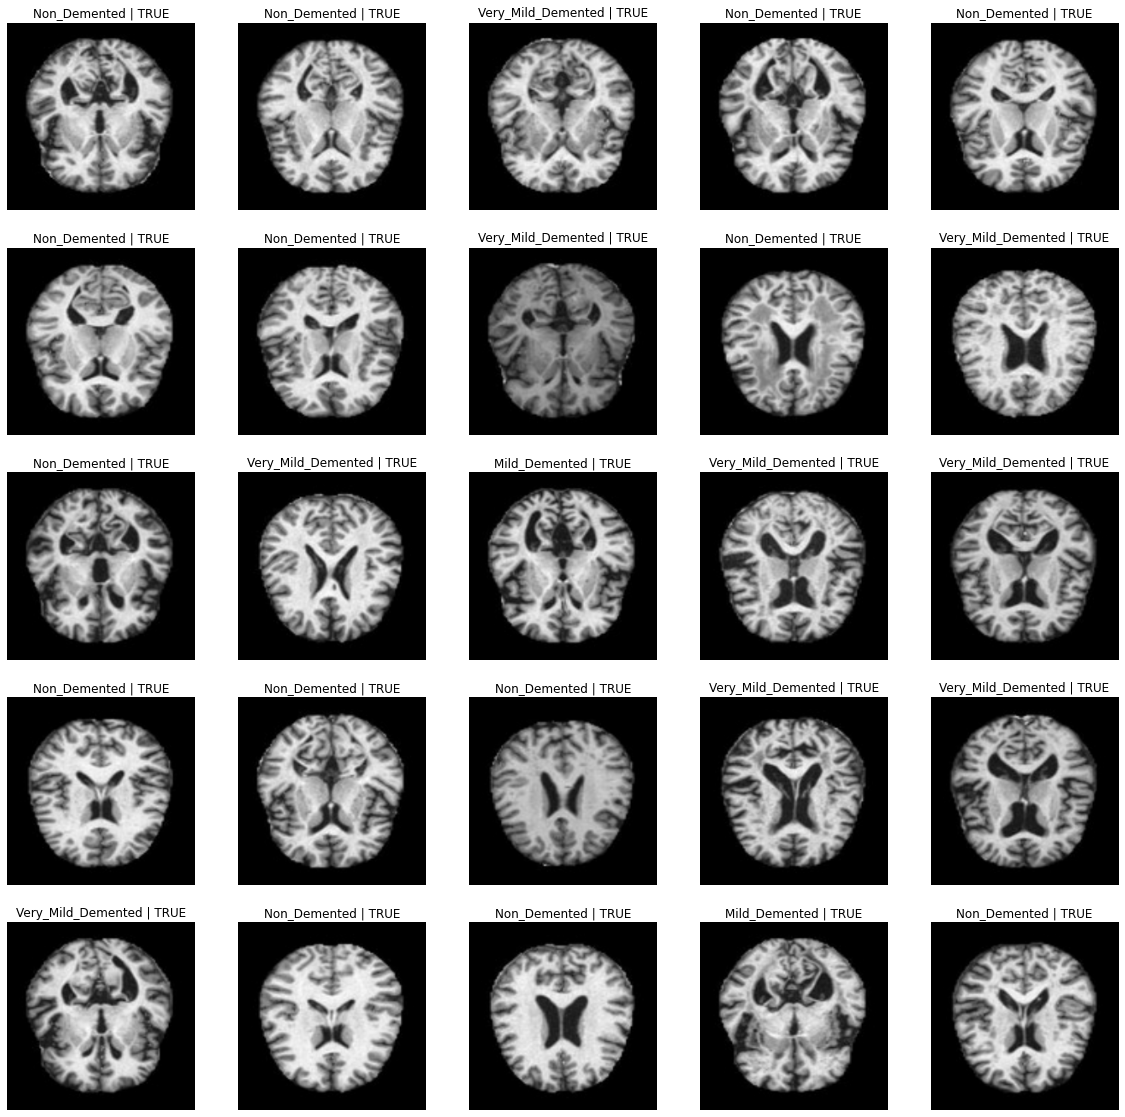

In [125]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [34]:
vs = 0.9
ssv = "validation"
sst = "training"
sd = 123
imh = 224
imw = 224
bz = 32

val_data2 = IFD(vs,ssv,sd,imh,imw,bz)
print("------")
train_data2 = IFD(vs,sst,sd,imh,imw,bz)

0.9 validation 123 224 224 32
Found 6400 files belonging to 4 classes.
Using 5760 files for validation.
------
0.9 training 123 224 224 32
Found 6400 files belonging to 4 classes.
Using 640 files for training.


In [35]:
from tensorflow.keras import layers

model2 = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape = (imh,imw,3)),
    layers.Conv2D(16,3,padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128,activation = "relu"),
    layers.Dense(4,activation="softmax")
])

In [36]:
model2.compile(optimizer = "Adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])
epochs = 50
history = model2.fit(train_data2,epochs = epochs,validation_data = val_data2,batch_size = bz)

Epoch 1/50
20/20 [==============================] - 6s 304ms/step - loss: 3.3456 - accuracy: 0.3187 - val_loss: 1.1875 - val_accuracy: 0.4986
Epoch 2/50
20/20 [==============================] - 6s 292ms/step - loss: 1.0680 - accuracy: 0.4875 - val_loss: 1.0257 - val_accuracy: 0.4995
Epoch 3/50
20/20 [==============================] - 6s 296ms/step - loss: 1.0344 - accuracy: 0.5125 - val_loss: 1.0147 - val_accuracy: 0.4986
Epoch 4/50
20/20 [==============================] - 6s 300ms/step - loss: 1.0027 - accuracy: 0.5125 - val_loss: 1.0019 - val_accuracy: 0.5101
Epoch 5/50
20/20 [==============================] - 6s 295ms/step - loss: 0.9971 - accuracy: 0.5125 - val_loss: 1.0271 - val_accuracy: 0.4986
Epoch 6/50
20/20 [==============================] - 6s 306ms/step - loss: 0.9730 - accuracy: 0.5359 - val_loss: 0.9750 - val_accuracy: 0.5325
Epoch 7/50
20/20 [==============================] - 6s 297ms/step - loss: 0.9348 - accuracy: 0.5734 - val_loss: 0.9858 - val_accuracy: 0.5137
Epoch 

In [ ]:
history = model2.fit(train_data2,epochs = epochs,validation_data = val_data2,batch_size = bz)
model2.save('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/ALZ2_.h5')
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [19]:
vs = 0.95
ssv = "validation"
sst = "training"
sd = 123
imh = 224
imw = 224
bz = 32

val_data3 = IFD(vs,ssv,sd,imh,imw,bz)
print("------")
train_data3 = IFD(vs,sst,sd,imh,imw,bz)

0.95 validation 123 224 224 32
Found 6400 files belonging to 4 classes.
Using 6080 files for validation.
------
0.95 training 123 224 224 32
Found 6400 files belonging to 4 classes.
Using 320 files for training.


In [20]:
from tensorflow.keras import layers

model3 = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape = (imh,imw,3)),
    layers.Conv2D(16,3,padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128,activation = "relu"),
    layers.Dense(4,activation="softmax")
])

In [23]:
model3.compile(optimizer = "Adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])
epochs = 5
history = model3.fit(train,epochs = epochs,validation_data = val_data3,batch_size = bz)

Epoch 1/5
160/160 [==============================] - 19s 82ms/step - loss: 1.1641 - accuracy: 0.4984 - val_loss: 0.8717 - val_accuracy: 0.5895
Epoch 2/5
160/160 [==============================] - 13s 82ms/step - loss: 0.7980 - accuracy: 0.6404 - val_loss: 0.5514 - val_accuracy: 0.7990
Epoch 3/5
160/160 [==============================] - 13s 82ms/step - loss: 0.5590 - accuracy: 0.7635 - val_loss: 0.3541 - val_accuracy: 0.8980
Epoch 4/5
160/160 [==============================] - 13s 83ms/step - loss: 0.4130 - accuracy: 0.8334 - val_loss: 0.2490 - val_accuracy: 0.9225
Epoch 5/5
160/160 [==============================] - 13s 83ms/step - loss: 0.3190 - accuracy: 0.8748 - val_loss: 0.1533 - val_accuracy: 0.9645


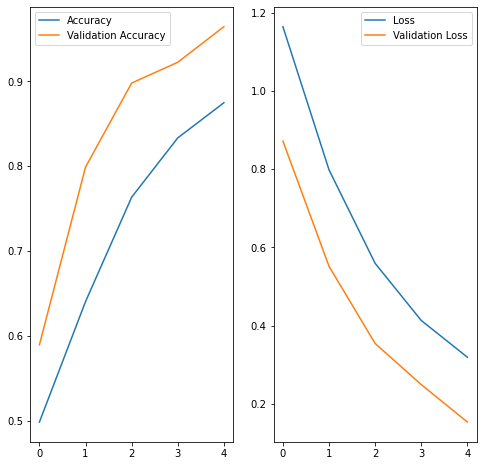

In [24]:
model3.save('C:/Users/akhil/OneDrive/Desktop/JUPYTER_PROJECTS/ALZ3.h5')
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 25ms/step


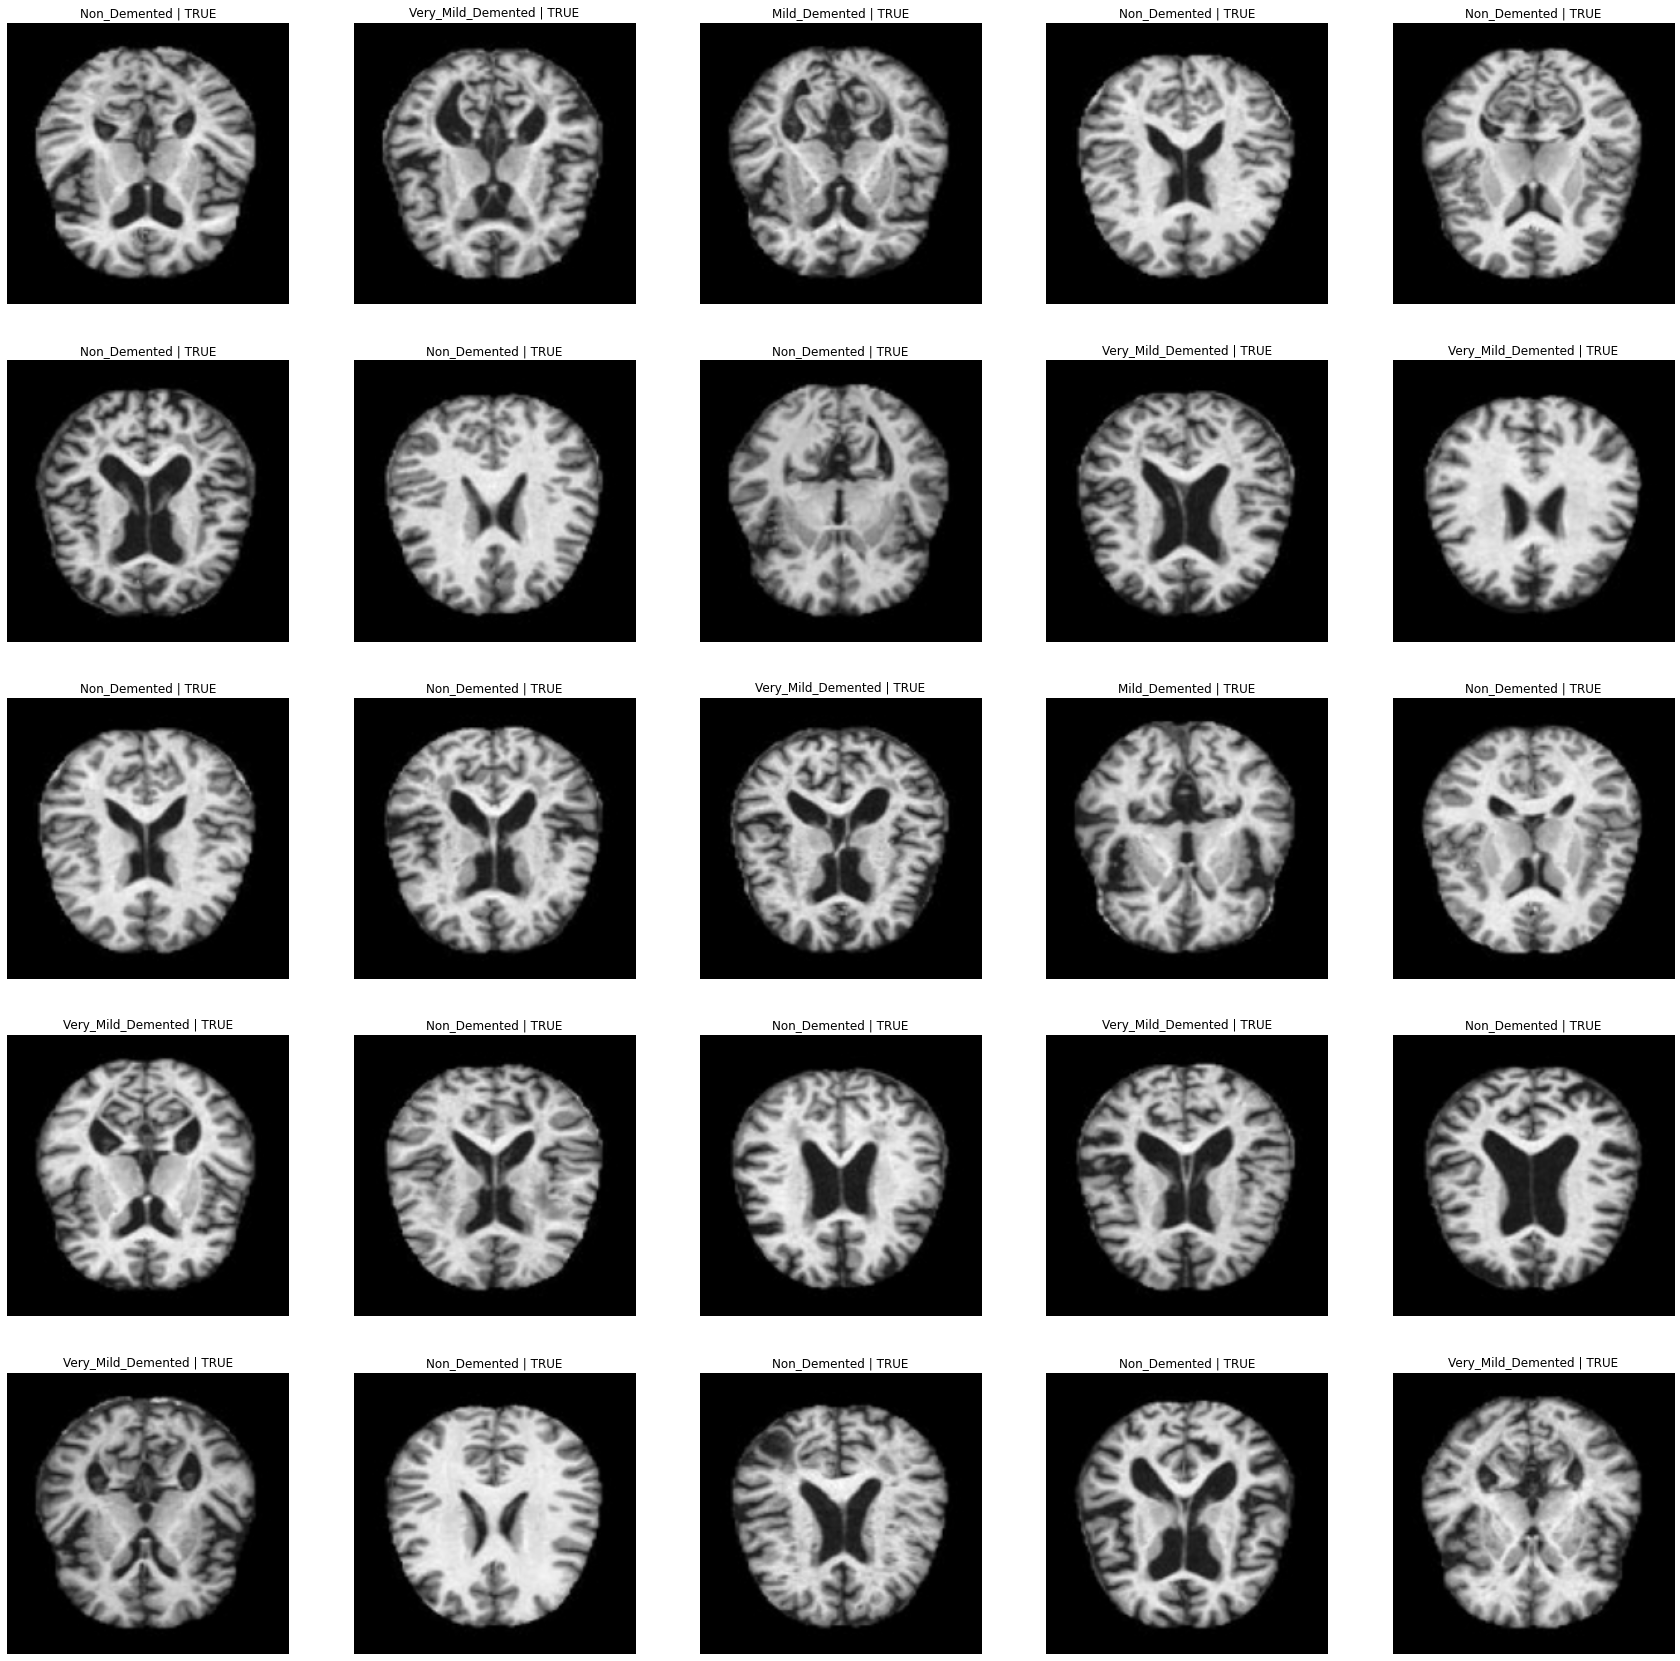

In [33]:
plt.figure(figsize=(30, 30))
class_names = val_data3.class_names
result = ' | False'
for images, labels in val_data3.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predictions = model3.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")